# Logistic Regression Derivation

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [215]:
iris = datasets.load_iris()

Each sample consists of four features: Sepal Length, Sepal Width, Sepal Length and Petal Width.

In [216]:
iris["data"][0]

array([5.1, 3.5, 1.4, 0.2])

In [217]:
feature_names = iris["feature_names"]
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The samples are labeled with 0, 1 or 2, corresponding to three different varieties of irises: 

In [218]:
np.sort(np.unique(iris["target"]))

array([0, 1, 2])

In [219]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [220]:
iris_df = pd.DataFrame(iris["data"], columns=feature_names)
iris_df["target"] = iris["target"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


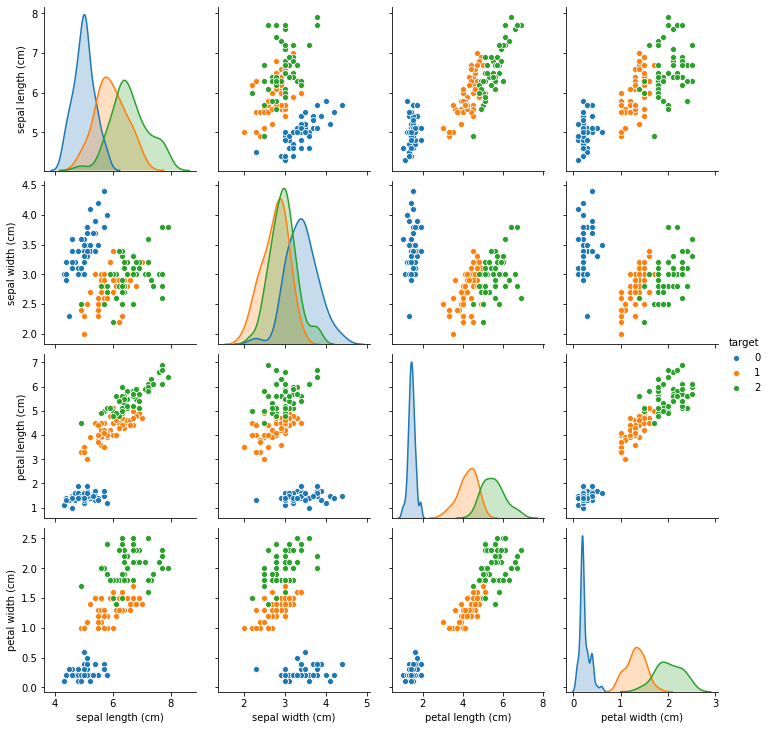

In [221]:
sns.pairplot(iris_df, vars=feature_names, hue="target")
plt.show()

The target = 0 class is clearly separable from the other two classes. Let's make this into a binary classification task by grouping targets 1 and 2 into a new class (3).

In [225]:
iris_df["target"] = (iris_df["target"] != 0) * 1
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


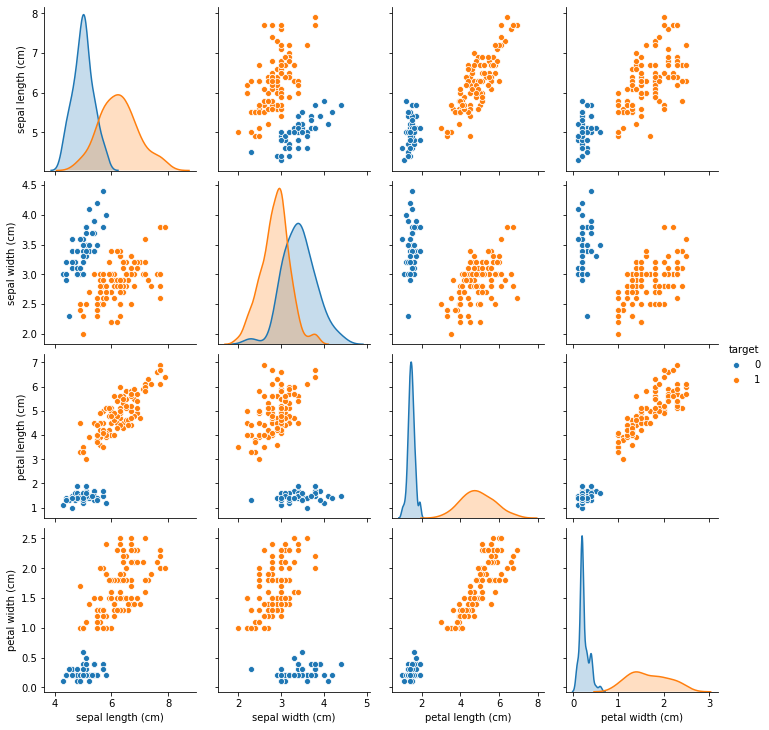

In [226]:
sns.pairplot(iris_df, vars=feature_names, hue="target")
plt.show()

Using two features: petal length and petal width.

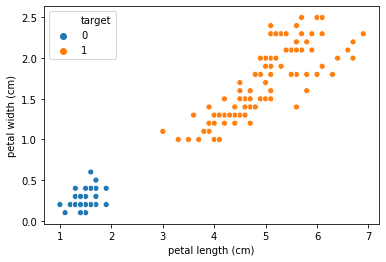

In [227]:
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_df)
plt.show()

The goal is to use logistic regression to separate the two classes.

In [228]:
X = iris_df[["petal length (cm)", "petal width (cm)"]]
y = iris_df["target"]

In [229]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [230]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [231]:
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshold=0.5):
    return predict_probs(X, theta) >= threshold

In [329]:
class logreg():
    def __init__(self, lr, n_iter):
        self.lr = lr
        self.n_iter = n_iter
        self.costs = []
        
    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        
    def fit(self, X, y):
        # Account for intercept
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        # Initialize weights (theta)
        self.theta = np.zeros(X.shape[1])

        for i in range(self.n_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)

            # Adjust parameters
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta = self.theta - self.lr * gradient

            # Store cost
            self.costs.append(self.cost(h, y))
    
    def plot_cost(self):
        plt.plot(self.costs)
        plt.title("Logistic Regression Cost")
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.show()

In [330]:
n_iter = 500
lr = 0.01
model = logreg(lr, n_iter)

In [331]:
model.fit(X, y)

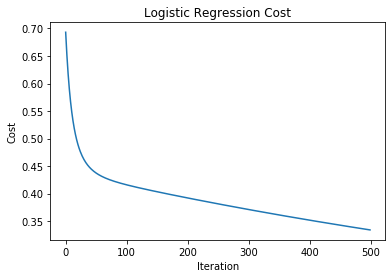

In [332]:
model.plot_cost()

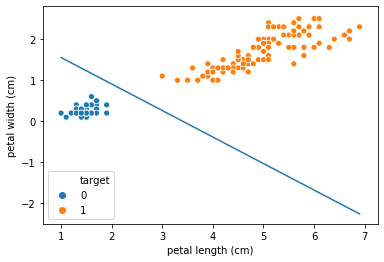

In [275]:
X_lim = [np.min(X.iloc[:,0]), np.max(X.iloc[:,0])]
y_boundary = - (theta[0] + np.dot(theta[1], X_lim)) / theta[2]

sns.lineplot(X_lim, y_boundary)
sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="target", data=iris_df)
plt.show()

In [278]:
def decision_boundary(model, X, y):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
    y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5
    mesh_step = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step), np.arange(y_min, y_max, mesh_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

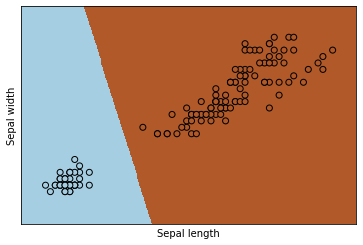

In [279]:
lr = LogisticRegression()
lr.fit(X, y)
decision_boundary(lr, X, y)